# Thermodynamic analysis of a novel metabolic engineering strategy for an efficient production of PHB from C

MDF analyses under different conditions

In [1]:
from equilibrator_api import Q_ #for creating quantity variables
import equilibrator_custom_functions as eq #custom functions created during analysis
import numpy as np #numerical package
import math
import matplotlib.pyplot as plt #plotting package
import custom_plot_functions as cpf

# Setting the systems conditions

pH, pMagnesium, Ionic strength and temperature are set here. "kcat_source": "fwd" is only required for Enzyme cost minimization calculations

In [2]:
#Setting physiological conditions as a Python dictionary
cellular_conditions = {
            "p_h": str(Q_("7.4")),
            "p_mg": str(Q_(3)),
            "ionic_strength": str(Q_('250 mM')),
            "temperature": str(Q_(30+273.15,"K")),
            "kcat_source": "fwd",
}

#Generating Compound Settings with the default eQuilibrator bounds
cs_default_bounds = eq.obtain_compound_settings("metabolite_reference_table_default", custom_bounds = True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
pathway_names = ['CO_to_PHB']
MDF_results = dict( [ (name, eq.MDF_analysis( name, cs_default_bounds, cellular_conditions, custom_dGs = False, print_results = False,y=1)) for name in pathway_names] )

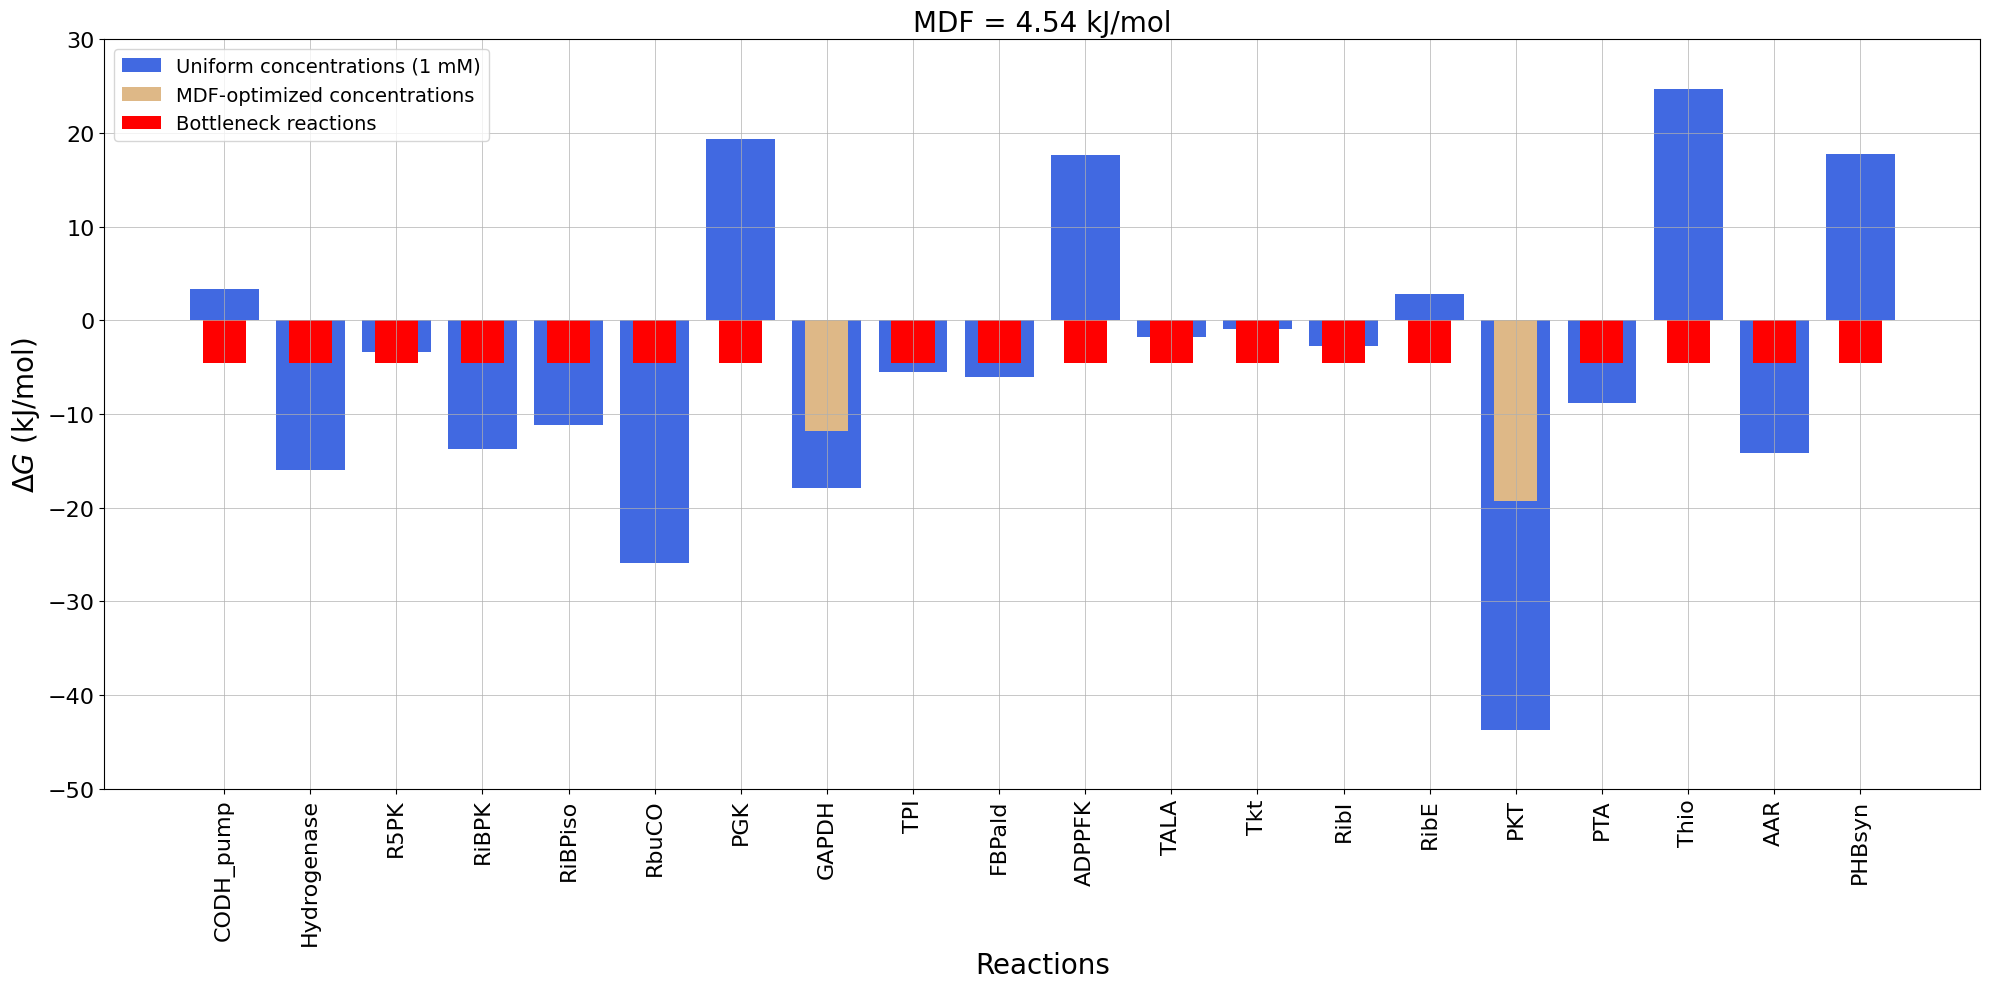

In [4]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Iterate through MDF_results
for name, MDF_result in MDF_results.items():
    # Obtain necessary data
    MDF, res1, g1, g2, g3, g4, flx, shp_r, r_id, res2, met, bl, bu, c, shp_c = eq.print_MDF_results_individual(MDF_result)

    # Plot the bar chart
    cpf.plot_bar_chart(MDF, g3, g4, r_id, shp_r, ax=ax)
    #cpf.plot_concentrations_my(MDF_result)  
    #display(res1)
    #display(res2)

# Set the y-axis limit
ax.set_ylim([-50, 30])

# Set x-axis tick rotation
ax.tick_params(axis='x', rotation=90)

# Customize fonts and legend
ax.set_xlabel('Reactions', fontsize=20)  # Set x-axis label and font size
ax.set_ylabel(r'$\Delta G$ (kJ/mol)', fontsize=20)

rounded_MDF = round(MDF, 2)

ax.set_title('MDF'+' = '+str(rounded_MDF)+' kJ/mol', fontsize=20)     # Set title and font size

# Adjust the size of tick labels
ax.tick_params(axis='both', labelsize=16)  # Set font size for minor ticks on both axes

# Customize legend
legend = ax.legend(loc='upper left', fontsize=14)  # Set legend location and font size

# Adjust the position of the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to make space for the legend

# Show the figure
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('MDF_CO_to_PHB.tif', dpi=150)

2 H2O + ADP + Pi + HB + 9 CO <=> ATP + 5 CO2 + PHB


'MDF = 4.54 kJ/mol'

,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,CODH_pump,ADP + Pi + CO <=> ATP + CO2 + H2,9.0 molar / second,19.580981635928993 kilojoule / mole,3.3856926751319385 kilojoule / mole,3.3856926751319385 kilojoule / mole,-4.537100349137756 kilojoule / mole,0.05051
1,Hydrogenase,NAD + H2 <=> NADH,9.0 molar / second,-38.84605486462806 kilojoule / mole,-33.053452209669494 kilojoule / mole,-15.938614674948465 kilojoule / mole,-4.537100350738334 kilojoule / mole,0.01341
2,R5PK,ATP + Ri5P <=> AMP + PRibPP,4.0 molar / second,-3.8926268584896206 kilojoule / mole,-3.3485420297061887 kilojoule / mole,-3.3485420297061887 kilojoule / mole,-4.53710034899282 kilojoule / mole,0.06903
3,RiBPK,ADP + PRibPP <=> ATP + RiBP,4.0 molar / second,-10.925665840501779 kilojoule / mole,-13.700830711643217 kilojoule / mole,-13.700830711643217 kilojoule / mole,-4.537100348998839 kilojoule / mole,0.06903
4,RiBPiso,RiBP <=> RuBP,4.0 molar / second,-12.120847922105327 kilojoule / mole,-11.168204704099448 kilojoule / mole,-11.168204704099448 kilojoule / mole,-4.537100349770521 kilojoule / mole,0.02525
5,RbuCO,H2O + CO2 + RuBP <=> 2 P3G,4.0 molar / second,-32.555832959096676 kilojoule / mole,-25.856607574254504 kilojoule / mole,-25.856607574254504 kilojoule / mole,-4.53710034975096 kilojoule / mole,0.02525
6,PGK,ATP + P3G <=> ADP + BPG,8.0 molar / second,19.4872870433567 kilojoule / mole,19.37196938276014 kilojoule / mole,19.37196938276014 kilojoule / mole,-4.537100349121674 kilojoule / mole,0.05051
7,GAPDH,NADH + BPG <=> NAD + Pi + G3P,8.0 molar / second,-0.9203025048500422 kilojoule / mole,-0.7692402795834076 kilojoule / mole,-17.88407781430444 kilojoule / mole,-11.854452295836603 kilojoule / mole,0.00000
8,TPI,G3P <=> DHAP,4.0 molar / second,-5.617129011823096 kilojoule / mole,-5.562241899850373 kilojoule / mole,-5.562241899850373 kilojoule / mole,-4.537100351833298 kilojoule / mole,0.00503
9,FBPald,G3P + DHAP <=> FBP,4.0 molar / second,-23.259366618471745 kilojoule / mole,-23.19499041090405 kilojoule / mole,-6.080152876183018 kilojoule / mole,-4.53710035167072 kilojoule / mole,0.00503


,compound_id,concentration,lower_bound,upper_bound,shadow_price
0,H2O,1.000000000000201 molar,1.0 molar,1.0 molar,0.06257
1,ATP,0.00440904689448402 molar,0.00279 molar,0.006 molar,0.00000
2,ADP,8.000000001751787e-05 molar,8e-05 molar,0.002 molar,-0.12764
3,NAD,0.00014167914980702057 molar,5e-06 molar,0.002 molar,0.00000
4,Pi,3.3725113008433604e-05 molar,5e-06 molar,0.002 molar,-0.00000
5,NADH,7.060045621413823e-05 molar,5e-06 molar,0.002 molar,-0.00000
6,CoA,5.924714715348739e-06 molar,5e-06 molar,0.002 molar,-0.00000
7,CO2,5.000000002576347e-06 molar,5e-06 molar,0.033 molar,-0.06257
8,AMP,0.0019999999995431307 molar,3e-05 molar,0.002 molar,0.12764
9,AcCoA,0.0019999999989604215 molar,5e-06 molar,0.002 molar,0.05869


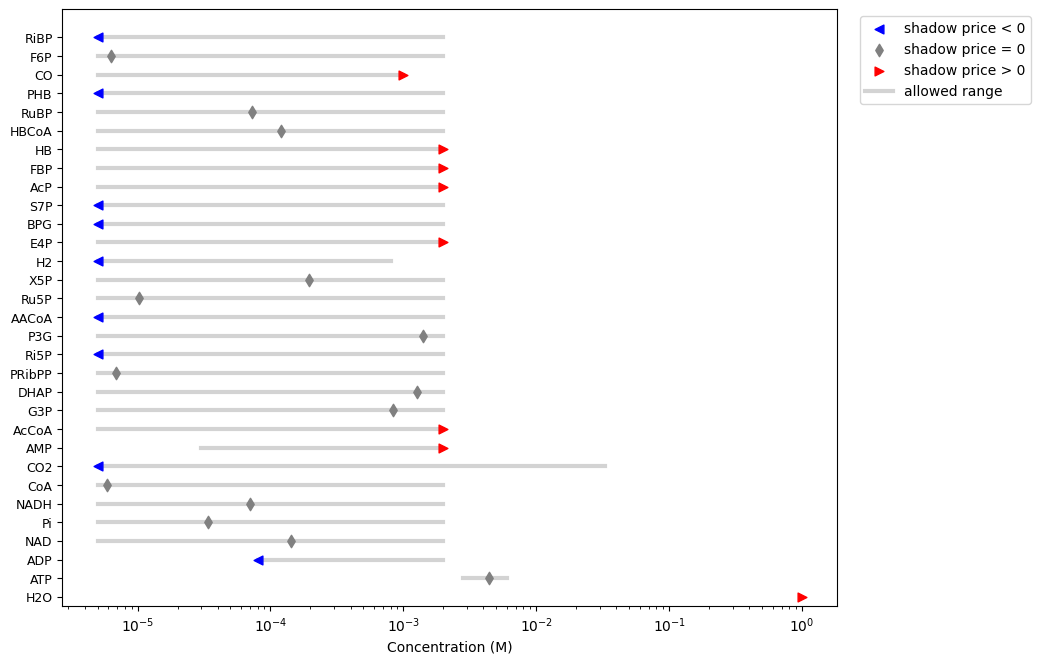

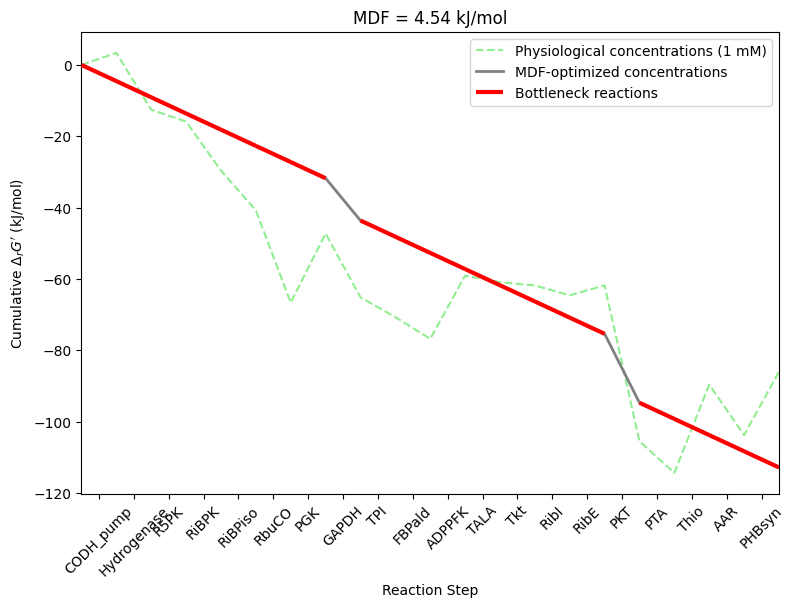

In [5]:
#repeating the MDF calculation with a different method to get more easy the concentrations and the standard dG values
mdf_result = eq.MDF_analysis("CO_to_PHB",cs_default_bounds,cellular_conditions)

In [6]:
import numpy as np
import pandas as pd

# Convert map object to a list and extract compound names
list_mets = list(mdf_result.compound_ids)

# Extract concentrations and convert to numerical values
values_mets = [conc.magnitude for conc in mdf_result.compound_df.concentration]

# Convert concentrations to mM
values_mets = np.array(values_mets)

#Rounding the numbers
#values_mets = np.round(values_mets, 3)

# Create a DataFrame
df = pd.DataFrame({'Compound': list_mets, 'Concentration (M)': values_mets})

# Export DataFrame to a .txt file
df.to_csv('compound_concentrations.txt', sep='\t', index=False)

# Display DataFrame
print(df)


   Compound  Concentration (M)
0       H2O           1.000000
1       ATP           0.004409
2       ADP           0.000080
3       NAD           0.000142
4        Pi           0.000034
5      NADH           0.000071
6       CoA           0.000006
7       CO2           0.000005
8       AMP           0.002000
9     AcCoA           0.002000
10      G3P           0.000842
11     DHAP           0.001274
12   PRibPP           0.000007
13     Ri5P           0.000005
14      P3G           0.001408
15    AACoA           0.000005
16     Ru5P           0.000010
17      X5P           0.000196
18       H2           0.000005
19      E4P           0.002000
20      BPG           0.000005
21      S7P           0.000005
22      AcP           0.002000
23      FBP           0.002000
24       HB           0.002000
25    HBCoA           0.000120
26     RuBP           0.000073
27      PHB           0.000005
28       CO           0.001000
29      F6P           0.000006
30     RiBP           0.000005


In [7]:
standard_dg_prime_rxns = mdf_result.reaction_df['reaction_id']
standard_dg_prime_values = mdf_result.reaction_df['standard_dg_prime']
numeric_values = [round(value.magnitude, 2) for value in standard_dg_prime_values.values]

# Print and save to a text file
with open('standard_dGs.txt', 'w', encoding='utf-8') as file:
    # Print headers
    file.write("reactions\t∆rG (kJ/mol)\n")
    
    # Print data
    for rxn, value in zip(standard_dg_prime_rxns, numeric_values):
        file.write(f"{rxn}\t{value}\n")
# Print headers
print("reactions\t∆rG (kJ/mol)")

# Print data
for rxn, value in zip(standard_dg_prime_rxns, numeric_values):
    print(f"{rxn}\t{value}")

reactions	∆rG (kJ/mol)
CODH_pump	3.39
Hydrogenase	-33.05
R5PK	-3.35
RiBPK	-13.7
RiBPiso	-11.17
RbuCO	-25.86
PGK	19.37
GAPDH	-0.77
TPI	-5.56
FBPald	-23.19
ADPPFK	17.7
TALA	-1.81
Tkt	-0.92
RibI	-2.76
RibE	2.78
PKT	-43.7
PTA	-8.85
Thio	24.73
AAR	-14.15
PHBsyn	17.77
